# Time Series Linear Regression from scratch
### A small thing I thought was a big thing after it caught my attention at 1 AM
### Resources used:
- https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72
- https://www.youtube.com/watch?v=VmbA0pi2cRQ&t=11s

The linear regression style that will be implemented will be least mean squared, however gradiant decent is also an option I will explore

# Ordinary Least Mean Square:
Taking a look at the image below:
![Example](https://miro.medium.com/v2/resize:fit:856/format:webp/1*2LEjQZEKKYAqKHt8niVp2Q.png)

The line seen in the graph is the relationship between data that I want, we want to minimize the amount of error as much as possible, lines of best that pass through as many points as possible reduces error shown below in this image:
![Example2](https://miro.medium.com/v2/resize:fit:710/1*LxQraU40CdL9Qd9uSsq_xg.gif)

With the total error of the linear model being the sum of every error at each point:

$\sum_{i=1}^{n}r_{i}^2$

We need to square each of the distance's because some poitns will be above and below the line, we can minimize error in the linear model by minimizing **r** therefore we have:

$\beta_{i} = \frac{\sum_{i}(x_{i}-x)(y_{i}-y)}{\sum_{i}(x_{i}-x)^{2}}$

# Getting data:
I will not be using Numpy and will only use Pandas to get data and matplotlib to plot said data, nothing more will be used and everything else is implemented. **For our purposes I will be working with financial data using pandas data reader for Yahoo Finance**
We will also be using **only** the **Adj Close** column for our purposes, with the date serving as the x axis and Adj Close on the y

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()

In [28]:
ticker = ["AAPL"]
start = datetime(2020, 1, 1)
end = datetime(2021,1,1)
aapl_data = pdr.get_data_yahoo(ticker, start,end)
print(aapl_data.shape)
aapl_data.head()

[*********************100%***********************]  1 of 1 completed
(253, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449387,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314896,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970085,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143906,132079200


In [31]:
ticker = ["SPY"]
start = datetime(2020, 1, 1)
end = datetime(2021,1,1)
spy_data = pdr.get_data_yahoo(ticker, start,end)
print(spy_data.shape)
spy_data.head()

[*********************100%***********************]  1 of 1 completed
(253, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,308.517456,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,306.181244,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,307.349365,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,306.485199,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,308.118622,68296000


#### We will first be performing OLS Regression and then move on to statistical testing:

In [32]:
X = spy_data['Adj Close'].values
Y = aapl_data['Adj Close'].values
print(X)
print(Y)

[308.51745605 306.1812439  307.34936523 306.48519897 308.11862183
 310.20782471 309.31512451 311.44241333 310.96755981 311.67034912
 314.26290894 315.24108887 314.62380981 314.66174316 315.02264404
 312.22109985 307.21646118 310.4357605  310.17944336 311.18597412
 305.53555298 307.80514526 312.496521   316.10528564 317.16888428
 315.47851562 317.83361816 318.38446045 320.43582153 320.09390259
 320.60665894 319.78048706 321.30944824 319.9894104  316.6940918
 306.1907959  296.91256714 295.82046509 282.53466797 281.34753418
 293.53170776 285.12719727 297.11199951 287.23538208 282.4871521
 260.42642212 273.9022522  260.54989624 235.62124634 255.76359558
 227.77700806 240.07514954 227.91943359 228.40376282 218.56086731
 212.97268677 232.26869202 235.74580383 249.51091003 242.07910156
 249.94076538 246.21537781 235.13444519 240.56027222 237.0831604
 253.00712585 253.2651062  261.76675415 265.75018311 263.32382202
 271.09005737 265.32983398 266.60992432 273.81246948 268.98846436
 260.82110596

In [35]:
# Calculate mean manually:
def get_mean(data):
    sum = 0
    for item in data:
        sum+=item
    return sum / data.size

x_mean = get_mean(X)
y_mean = get_mean(Y)
n = X.size

# Calculate B1 and B0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean)**2
    
b1 = numerator/denominator
b0 = y_mean - (b1 * x_mean)
print(b1,b0)

0.6044890174721598 -92.21716154888928


In [42]:
# Lets plot these values using matplotlib

# Find max manually:
def get_max(data):
    max_item = 0
    for item in data:
        if item > max_item:
            max_item = item
    return max_item

# Find min manually:
def get_min(data):
    min_item = 0
    for item in data:
        if min_item > item:
            min_item = item
    return min_item

x_max = get_max(X)
x_min = get_min(X) + 200 # Adjusted for scaling

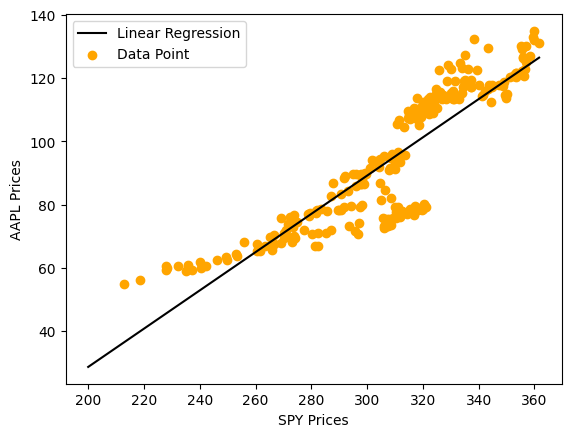

In [50]:
# For these purposes only we will use NumPy to get line spacing for graphing
import numpy as np
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

# Plotting the line
plt.plot(x,y,color='#000000',label='Linear Regression')
plt.scatter(X,Y,color='#FFA500',label='Data Point')
plt.xlabel('SPY Prices')
plt.ylabel('AAPL Prices')
plt.legend()
plt.show()